In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [144]:
data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ],
    dtype=np.float32
)
targets = np.array([0, 1, 1, 0])

(-0.1, 1.1)

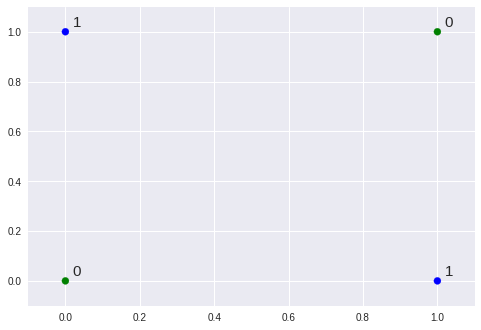

In [145]:
colors = {0: 'green', 1: 'blue'}
plt.scatter(data[:, 0], data[:, 1], c=[colors[t] for t in targets])
for datum, target in zip(data, targets):
    plt.text(datum[0]+0.02, datum[1]+0.02, target, fontsize=15)
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))

# Keras

In [146]:
import tensorflow as tf

In [147]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_dim=2, name='hidden'))
model.add(tf.keras.layers.Dense(1, name='output', activation='softmax'))

In [148]:
model.compile('sgd', 'binary_crossentropy')

In [149]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 2)                 6         
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [150]:
model.fit(data, targets, epochs=1000, verbose=0, batch_size=1)

In [151]:
model.predict(data)

array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [152]:
model.get_layer('hidden').get_weights()

[array([[-0.31371373, -0.54256237],
        [ 0.4127847 , -0.8518935 ]], dtype=float32),
 array([0., 0.], dtype=float32)]

# Pytorch 

# Tensorflow